# Analiza biblioteki PyKEEN

## Kluczowe wniosku:
* duża reużywalonosć kodu - pozwala to na łatwość powtarzania eksperymentów z różnymi konfiguracjami, dodatkowo została zaimplementowana metoda, która podsumowuje nam wszystkie wykonane eksperymenty i zapisuje do pliku .csv;
* odtwarzalność eksperymentów - w łatwy sposób, posiadając zbiór danych i plik konfiguracyjny, możemy odtworzyć eksperymenty innych osób;
* łatwość użytkowania - cały kod opiera się na obiektach oraz posiada dokumentacje, która krok po kroku prowadzi użytkownika przez daną funkcjonalność. Dodatkowo możemy skorzystać z interaktywnego interfejsu tekstowego, który również przeprowadza użytkownika przez niezbędne kroki konfiguracyjne, dzięki czemu z obsługą biblioteki poradzą sobie mniej techniczni zainteresowani; 
* duża ilość zaimplementowanych algorytmów tworzenia KGE(ang. Knowledge Graph Embeddings) oraz modularna architektura, która pozwala na tworzenie własnych modeli;
* wsparcie dla GPU poprzez wykorzystanie biblioteki Torch;
* brak wsparcia dla początkujących użytkowników - w łatwy sposób można wzbogacić dokumentacje o odnośniki bądź krótkie wyjaśnienia dotyczące zagadnień, w kontekście notebooków, które pokazują proste przykłady bądź opisują framework pracy z biblioteką;
* dodatkowo warto byłoby zaimplementować mechanizm, który wizualizowałby graf.

## Konfiguracja treningu modelu i jego ewaluacja

In [3]:
import pykeen
import json
import numpy as np
import matplotlib.pyplot as plt
#TransE
SG4MR_CONF_PATH="SG4MR_scholarly_data_recommendations/conf.json"
COMPATH_CONF_PATH="Compath_bioinformatics/conf.json"

def train_model(configuration_path):
    with open(configuration_path, 'r') as f:
        content_file = json.load(f)
    print("Config file: ")
    print(content_file)

    results = pykeen.run(config=content_file)
    return results

def print_results(results):
    print('Keys:', *sorted(results.results.keys()), sep='\n  ')
    print(results.trained_model)
    print(results.results['eval_summary'])
    
def visualize_loss_function(losses):
    epochs = np.arange(len(losses))
    plt.title(r'Loss Per Epoch')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(epochs, losses)
    plt.show()

In [4]:
results_SG4MR = train_model(SG4MR_CONF_PATH)

Config file: 
{'training_set_path': 'SG4MR_scholarly_data_recommendations/train.tsv', 'execution_mode': 'Training_mode', 'kg_embedding_model_name': 'TransE', 'embedding_dim': 100, 'margin_loss': 8.0, 'scoring_function': 1, 'normalization_of_entities': 2, 'learning_rate': 0.1, 'batch_size': 256, 'num_epochs': 100, 'test_set_path': 'SG4MR_scholarly_data_recommendations/test.tsv', 'filter_negative_triples': True, 'preferred_device': 'cpu', 'output_direc': 'SG4MR_scholarly_data_recommendations/output', 'num_entities': 12609, 'num_relations': 4}



Training epoch:  67%|███████████████████████████████████████████▌                     | 67/100 [10:11<05:05,  9.26s/it]


⚽️ corrupting triples:   1%|▎                                                        | 34/6000 [00:05<16:45,  5.93it/s]


⚽️ corrupting triples:   2%|▉                                                       | 102/6000 [00:18<25:03,  3.92it/s]


⚽️ corrupting triples:   3%|█▌                                                      | 170/6000 [00:32<16:33,  5.87it/s]


⚽️ corrupting triples:   4%|██▏                                                     | 238/6000 [00:46<20:00,  4.80it/s]


⚽️ corrupting triples:   5%|██▊                                                     | 306/6000 [00:59<15:00,  6.33it/s]


⚽️ corrupting triples:   6%|███▍                                                    | 374/6000 [01:13<16:17,  5.75it/s]


⚽️ corrupting triples:   7%|████▏                                                   | 442/6000 [01:24<14:12,  6.52it/s]


⚽️ corrupting triples:   8%|████▊                                                   | 510/6000 [01:36<15:27,  5.92it/s]


⚽️ corrupting triples:  10%|█████▍                                                  | 578/6000 [01:48<15:43,  5.75it/s]


⚽️ corrupting triples:  11%|██████                                                  | 646/6000 [02:01<19:44,  4.52it/s]


⚽️ corrupting triples:  12%|██████▋                                                 | 714/6000 [02:15<13:22,  6.58it/s]


⚽️ corrupting triples:  13%|███████▎                                                | 782/6000 [02:27<17:41,  4.92it/s]


⚽️ corrupting triples:  14%|███████▉                                                | 850/6000 [02:40<16:53,  5.08it/s]


⚽️ corrupting triples:  15%|████████▌                                               | 918/6000 [02:50<12:58,  6.53it/s]


⚽️ corrupting triples:  16%|█████████▏                                              | 986/6000 [03:01<14:18,  5.84it/s]


⚽️ corrupting triples:  18%|█████████▋                                             | 1054/6000 [03:12<13:00,  6.34it/s]


⚽️ corrupting triples:  19%|██████████▎                                            | 1122/6000 [03:23<11:55,  6.82it/s]


⚽️ corrupting triples:  20%|██████████▉                                            | 1190/6000 [03:34<12:42,  6.31it/s]


⚽️ corrupting triples:  21%|███████████▌                                           | 1258/6000 [03:44<11:34,  6.83it/s]


⚽️ corrupting triples:  22%|████████████▏                                          | 1326/6000 [03:56<11:54,  6.54it/s]


⚽️ corrupting triples:  23%|████████████▊                                          | 1394/6000 [04:07<15:24,  4.98it/s]


⚽️ corrupting triples:  24%|█████████████▍                                         | 1462/6000 [04:19<12:39,  5.98it/s]


⚽️ corrupting triples:  26%|██████████████                                         | 1530/6000 [04:31<14:30,  5.14it/s]


⚽️ corrupting triples:  27%|██████████████▋                                        | 1598/6000 [04:42<12:31,  5.85it/s]


⚽️ corrupting triples:  28%|███████████████▎                                       | 1666/6000 [04:55<13:54,  5.20it/s]


⚽️ corrupting triples:  29%|███████████████▉                                       | 1734/6000 [05:09<12:38,  5.62it/s]


⚽️ corrupting triples:  30%|████████████████▌                                      | 1802/6000 [05:21<16:17,  4.29it/s]


⚽️ corrupting triples:  31%|█████████████████▏                                     | 1870/6000 [05:35<16:18,  4.22it/s]


⚽️ corrupting triples:  32%|█████████████████▊                                     | 1938/6000 [05:47<11:54,  5.69it/s]


⚽️ corrupting triples:  33%|██████████████████▍                                    | 2006/6000 [05:58<11:27,  5.81it/s]


⚽️ corrupting triples:  35%|███████████████████                                    | 2074/6000 [06:10<10:49,  6.04it/s]


⚽️ corrupting triples:  36%|███████████████████▋                                   | 2142/6000 [06:21<12:45,  5.04it/s]


⚽️ corrupting triples:  37%|████████████████████▎                                  | 2210/6000 [06:34<10:22,  6.09it/s]


⚽️ corrupting triples:  38%|████████████████████▉                                  | 2278/6000 [06:47<13:27,  4.61it/s]


⚽️ corrupting triples:  39%|█████████████████████▌                                 | 2346/6000 [07:00<12:00,  5.07it/s]


⚽️ corrupting triples:  40%|██████████████████████▏                                | 2414/6000 [07:13<15:05,  3.96it/s]


⚽️ corrupting triples:  41%|██████████████████████▊                                | 2482/6000 [07:27<10:54,  5.37it/s]


⚽️ corrupting triples:  42%|███████████████████████▍                               | 2550/6000 [07:39<10:06,  5.69it/s]


⚽️ corrupting triples:  44%|███████████████████████▉                               | 2618/6000 [07:51<10:50,  5.20it/s]


⚽️ corrupting triples:  45%|████████████████████████▌                              | 2686/6000 [08:06<12:07,  4.55it/s]


⚽️ corrupting triples:  46%|█████████████████████████▏                             | 2754/6000 [08:21<09:02,  5.98it/s]


⚽️ corrupting triples:  47%|█████████████████████████▊                             | 2822/6000 [08:33<09:25,  5.62it/s]


⚽️ corrupting triples:  48%|██████████████████████████▍                            | 2890/6000 [08:46<10:08,  5.11it/s]


⚽️ corrupting triples:  49%|███████████████████████████                            | 2958/6000 [08:59<12:15,  4.14it/s]


⚽️ corrupting triples:  50%|███████████████████████████▋                           | 3026/6000 [09:13<07:40,  6.45it/s]


⚽️ corrupting triples:  52%|████████████████████████████▎                          | 3094/6000 [09:25<10:16,  4.71it/s]


⚽️ corrupting triples:  53%|████████████████████████████▉                          | 3162/6000 [09:39<09:21,  5.06it/s]


⚽️ corrupting triples:  54%|█████████████████████████████▌                         | 3230/6000 [09:52<09:59,  4.62it/s]


⚽️ corrupting triples:  55%|██████████████████████████████▏                        | 3298/6000 [10:07<09:23,  4.80it/s]


⚽️ corrupting triples:  56%|██████████████████████████████▊                        | 3366/6000 [10:22<08:13,  5.34it/s]


⚽️ corrupting triples:  57%|███████████████████████████████▍                       | 3434/6000 [10:35<07:11,  5.94it/s]


⚽️ corrupting triples:  58%|████████████████████████████████                       | 3502/6000 [10:48<07:14,  5.74it/s]


⚽️ corrupting triples:  60%|████████████████████████████████▋                      | 3570/6000 [11:00<07:59,  5.07it/s]


⚽️ corrupting triples:  61%|█████████████████████████████████▎                     | 3638/6000 [11:13<07:07,  5.52it/s]


⚽️ corrupting triples:  62%|█████████████████████████████████▉                     | 3706/6000 [11:25<05:50,  6.55it/s]


⚽️ corrupting triples:  63%|██████████████████████████████████▌                    | 3774/6000 [11:38<07:27,  4.98it/s]


⚽️ corrupting triples:  64%|███████████████████████████████████▏                   | 3842/6000 [11:51<06:14,  5.76it/s]


⚽️ corrupting triples:  65%|███████████████████████████████████▊                   | 3910/6000 [12:02<05:59,  5.81it/s]


⚽️ corrupting triples:  66%|████████████████████████████████████▍                  | 3978/6000 [12:16<07:08,  4.72it/s]


⚽️ corrupting triples:  67%|█████████████████████████████████████                  | 4046/6000 [12:28<05:46,  5.64it/s]


⚽️ corrupting triples:  69%|█████████████████████████████████████▋                 | 4114/6000 [12:41<06:22,  4.94it/s]


⚽️ corrupting triples:  70%|██████████████████████████████████████▎                | 4182/6000 [12:56<08:07,  3.73it/s]


⚽️ corrupting triples:  71%|██████████████████████████████████████▉                | 4250/6000 [13:10<06:25,  4.54it/s]


⚽️ corrupting triples:  72%|███████████████████████████████████████▌               | 4318/6000 [13:25<05:56,  4.72it/s]


⚽️ corrupting triples:  73%|████████████████████████████████████████▏              | 4386/6000 [13:39<04:51,  5.53it/s]


⚽️ corrupting triples:  74%|████████████████████████████████████████▊              | 4454/6000 [13:54<05:50,  4.41it/s]


⚽️ corrupting triples:  75%|█████████████████████████████████████████▍             | 4522/6000 [14:08<04:32,  5.43it/s]


⚽️ corrupting triples:  76%|██████████████████████████████████████████             | 4590/6000 [14:20<04:35,  5.12it/s]


⚽️ corrupting triples:  78%|██████████████████████████████████████████▋            | 4658/6000 [14:32<03:49,  5.84it/s]


⚽️ corrupting triples:  79%|███████████████████████████████████████████▎           | 4726/6000 [14:44<04:08,  5.13it/s]


⚽️ corrupting triples:  80%|███████████████████████████████████████████▉           | 4794/6000 [14:56<03:10,  6.32it/s]


⚽️ corrupting triples:  81%|████████████████████████████████████████████▌          | 4862/6000 [15:08<03:20,  5.68it/s]


⚽️ corrupting triples:  82%|█████████████████████████████████████████████▏         | 4930/6000 [15:19<03:03,  5.82it/s]


⚽️ corrupting triples:  83%|█████████████████████████████████████████████▊         | 4998/6000 [15:32<03:01,  5.52it/s]


⚽️ corrupting triples:  84%|██████████████████████████████████████████████▍        | 5066/6000 [15:44<02:51,  5.45it/s]


⚽️ corrupting triples:  86%|███████████████████████████████████████████████        | 5134/6000 [15:56<02:19,  6.22it/s]


⚽️ corrupting triples:  87%|███████████████████████████████████████████████▋       | 5202/6000 [16:09<02:31,  5.28it/s]


⚽️ corrupting triples:  88%|████████████████████████████████████████████████▎      | 5270/6000 [16:22<01:59,  6.12it/s]


⚽️ corrupting triples:  89%|████████████████████████████████████████████████▉      | 5338/6000 [16:33<01:53,  5.82it/s]


⚽️ corrupting triples:  90%|█████████████████████████████████████████████████▌     | 5406/6000 [16:44<01:29,  6.62it/s]


⚽️ corrupting triples:  91%|██████████████████████████████████████████████████▏    | 5474/6000 [16:57<01:39,  5.29it/s]


⚽️ corrupting triples:  92%|██████████████████████████████████████████████████▊    | 5542/6000 [17:08<01:18,  5.86it/s]


⚽️ corrupting triples:  94%|███████████████████████████████████████████████████▍   | 5610/6000 [17:19<01:03,  6.11it/s]


⚽️ corrupting triples:  95%|████████████████████████████████████████████████████   | 5678/6000 [17:32<00:58,  5.49it/s]


⚽️ corrupting triples:  96%|████████████████████████████████████████████████████▋  | 5746/6000 [17:44<00:48,  5.22it/s]


⚽️ corrupting triples:  97%|█████████████████████████████████████████████████████▎ | 5814/6000 [17:56<00:30,  6.16it/s]


⚽️ corrupting triples:  98%|█████████████████████████████████████████████████████▉ | 5882/6000 [18:09<00:30,  3.87it/s]


⚽️ corrupting triples:  99%|██████████████████████████████████████████████████████▌| 5950/6000 [18:20<00:08,  5.96it/s]


⚽️ corrupting triples: 100%|███████████████████████████████████████████████████████| 6000/6000 [18:28<00:00,  6.25it/s]

In [5]:
print_results(results_SG4MR)

Keys:
  entity_to_embedding
  entity_to_id
  eval_summary
  final_configuration
  losses
  relation_to_embedding
  relation_to_id
  trained_model
TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(12609, 100)
  (relation_embeddings): Embedding(4, 100)
)
{'mean_rank': 1160.97625, 'hits@k': {1: 0.04766666666666667, 3: 0.13358333333333333, 5: 0.17375, 10: 0.23341666666666666}}


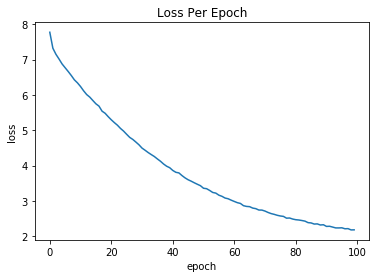

In [6]:
visualize_loss_function(results_SG4MR.results['losses'])

In [7]:
results_Compath = train_model(COMPATH_CONF_PATH)

Config file: 
{'training_set_path': 'Compath_bioinformatics/compath.tsv', 'execution_mode': 'Training_mode', 'kg_embedding_model_name': 'TransE', 'embedding_dim': 150, 'margin_loss': 12.0, 'scoring_function': 1, 'normalization_of_entities': 2, 'learning_rate': 0.01, 'batch_size': 32, 'num_epochs': 100, 'test_set_ratio': 0.1, 'filter_negative_triples': True, 'random_seed': 2, 'preferred_device': 'cpu', 'output_direc': 'Compath_bioinformatics/output', 'num_entities': 1125, 'num_relations': 2}



Training epoch:  67%|███████████████████████████████████████████▌                     | 67/100 [00:26<00:13,  2.41it/s]


⚽️ corrupting triples: 100%|█████████████████████████████████████████████████████████| 178/178 [00:04<00:00, 54.80it/s]

In [8]:
print_results(results_Compath)

Keys:
  entity_to_embedding
  entity_to_id
  eval_summary
  final_configuration
  losses
  relation_to_embedding
  relation_to_id
  trained_model
TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(1125, 150)
  (relation_embeddings): Embedding(2, 150)
)
{'mean_rank': 193.9494382022472, 'hits@k': {1: 0.07303370786516854, 3: 0.351123595505618, 5: 0.3651685393258427, 10: 0.41853932584269665}}


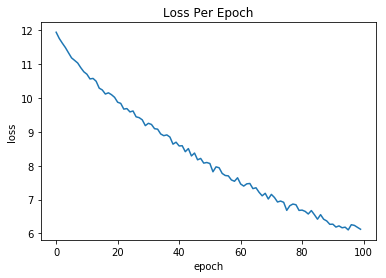

In [9]:
visualize_loss_function(results_Compath.results['losses'])

Metody tworzenia często ewaluowane są w odniesieniu do ich zdolności do przewidywania brakujących encji w negatywnych trójkach(ang. negative triples) lub czy dany, niewidziany fakt jest prawdziwy bądź nie. Metrykami używanymi są:
* mean rank - pozycja odpowiedzi w przewidywanej liście
* hit-k ratio - proporcja odpowiedzi w liście top-k odpowiedzi

## Wnioskowanie na podstawie modelu
PyKEEN, z wytrenowanego modelu KGE, jest w stanie przeprowadzać wnioskowanie. Na podstawie dostarczonego przez użytkownika zbioru interesujących go encji oraz zbioru interesujących go relacji biblioteka oblicza ich permutacje oraz predykcje. Predykcje zwracane są w postaci listy ułożonej malejąco od najbardziej wiarygodnych. Dodatkowo użytkownik może również, przed obliczeniami, podać listę trójek, które należy wykluczyć z obliczeń. 
Dokument, dostarczony przez twórców biblioteki, opisujący ten mechanizm:
https://github.com/SmartDataAnalytics/PyKEEN/blob/master/notebooks/perform_inference/Apply%20Infernce.ipynb

# Zaimplmentowane modele
Biblioteka zawiera duża ilość popularnych modeli używanych w  KGE:
* TransD
* TransE
* TransH
* TransR
* ConvE
* SE
* UM
* NDEx
* RESCAL

Warto zauważyć, że rodzaj modelu oraz jego parametry są podawane w pliku konfiguracyjnym co zdecydowanie ułatwia pracę i pozwala na powtórne wykorzystywanie kodu.

## Optymalizacja parametrów wybranego modelu

Często zdarza się, że nie znamy dokładnie najoptymalniejszych parametrów dla naszych danych. W takim przypadku warto sprawdzić jaka kombinacja parametrów, które podejrzewamy o bycie najlepszymi, da najlepsze efekty. PyKEEN posiada tryb optymalizacji hiperparametrów, który uruchamiamy przypisując do parametru 'execution_mode' w pliku konfiguracyjnym wartość 'hpo_mode', a nastepnie podać w postaci listy możliwe wartości.
Dokument, dostarczony przez twórców biblioteki, opisujący ten mechanizm: https://github.com/SmartDataAnalytics/PyKEEN/blob/master/notebooks/hyper_parameter_optimization/HPO%20Mode%20TransE%20on%20RDF.ipynb

## Podobne biblioteki(Python)
* pykg2vec
* OpenKE
* Ampligraph

## Źródła
https://pykeen.readthedocs.io/en/latest/index.html
https://pykg2vec.readthedocs.io
https://github.com/thunlp/OpenKE
https://www.ijcai.org/Proceedings/15/Papers/264.pdf (TransH)
http://papers.nips.cc/paper/5071-translating-embeddings-for-modeling-multi-relational-data.pdf (TransE)
https://arxiv.org/pdf/1506.00379.pdf (TransR)
